In [1]:
!pip install sep --quiet

In [26]:
import numpy as np
import astropy
import sep
from matplotlib import pyplot as plt
from astroquery.skyview import SkyView
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import astropy.units as u

# To improve Aesthetics of plots

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

# **Background estimation and subtraction**

To accurately measure the photometry and morphological properties of astronomical sources, one requires an accurate estimate of the background, which can be from both the sky and the detector. Similarly, having an accurate estimate of the background noise is important for determining the significance of source detections and for estimating photometric errors. 


Using SkyView get 'SDSSg' image of 'NGC 7617' with radius 3 arcminutes and 512 pixels.

In [5]:
position = 'NGC 7617'
radius = 3

path = SkyView.get_images(
    position,
    radius = radius*u.arcmin,
    pixels = 512,
    survey = ['SDSSg']
)

In [6]:
data = path[0][0].data

In [7]:
# Direct function for Log Stretch
norm = ImageNormalize(stretch = LogStretch())data

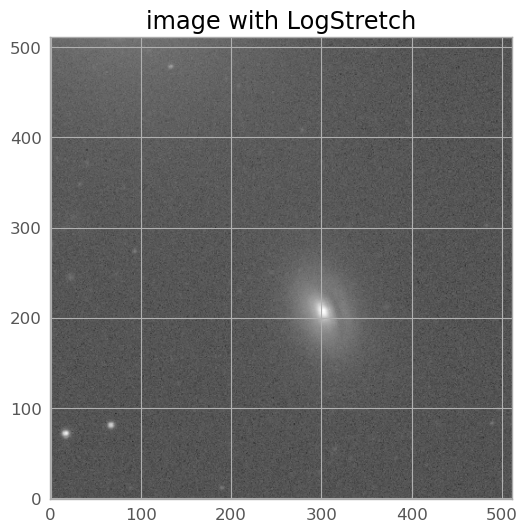

In [8]:
plt.title("image with LogStretch")
plt.imshow(
    data,
    origin = 'lower',
    cmap = 'gray',
    norm = norm
)

In [9]:
data = data.byteswap().newbyteorder()

In [10]:
bkg = sep.Background(data, bh = 64, bw = 64, fh = 3, fw = 3)
bkg_image = bkg.back()
bkg_rms = bkg.rms()

Here bh and bw are box height and width respectively and represent the height and width in pixels of the box to estimate the background

fh and fw are filter height and width for running convolutions and the box which is part of background estimation

bkg.back() returns the estimated background and bkg.rms() returns the root mean squared value of the estimated background

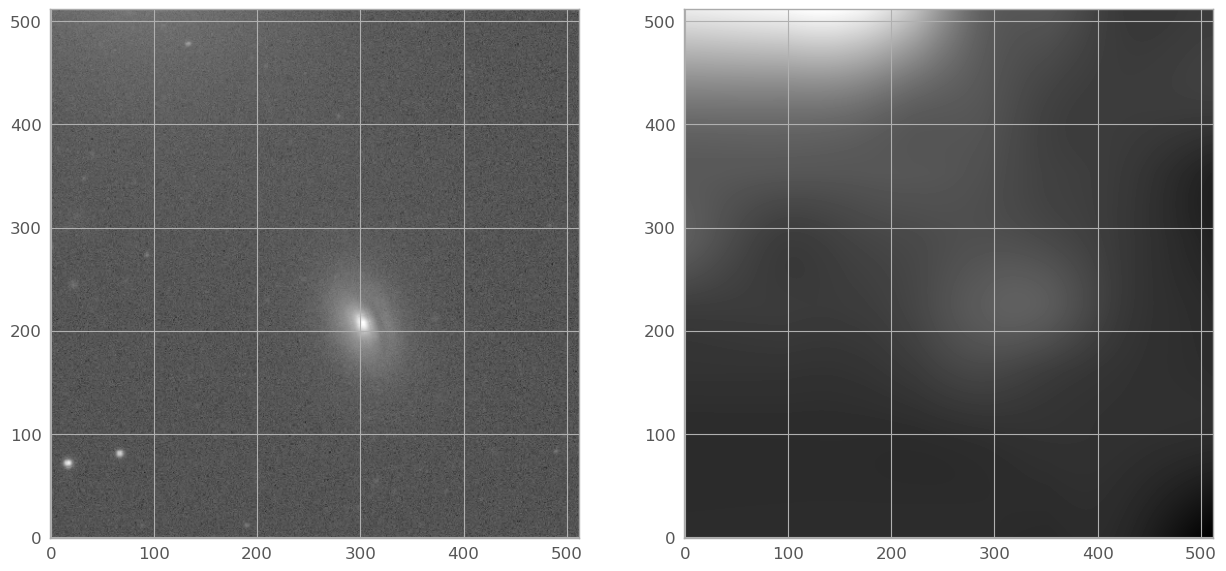

In [14]:
#code to display orginal image and bkg_image side by side
fig = plt.figure(figsize = (15, 20))
ax = fig.subplots(1, 2)

ax[0].imshow(
    data,
    origin = 'lower',
    cmap = 'gray',
    norm = norm
)
ax[1].imshow(
    bkg_image,
    origin = 'lower',
    cmap = 'gray'
)

From the background estimation we see that there's a bright source in the top left corner (when origin='lower')

Using SkyView get 'SDSSg' image of 'NGC 7617' with radius 10 arcminutes and colormap  'hsv'

In [15]:
position = 'NGC 7617'
radius = 10

path = SkyView.get_images(
    position = position,
    radius = radius*u.arcmin,
    survey = ['SDSSg']
)

In [16]:
data = path[0][0].data

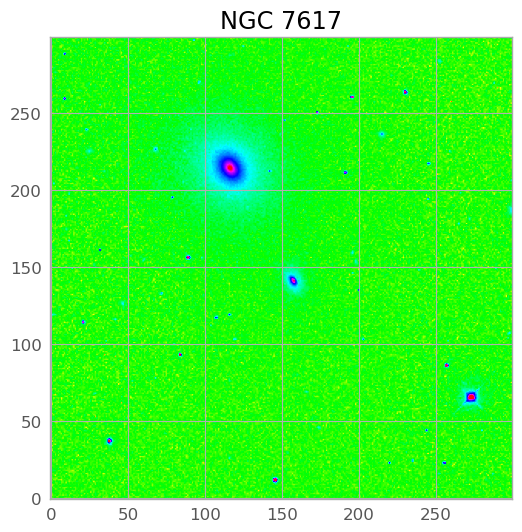

In [17]:
plt.title("NGC 7617")
plt.imshow(
    data,
    origin = 'lower',
    cmap = 'hsv',
    norm = norm
)

From the image of NGC 7617 with radius 10 arc minutes we see that there's a very bright source very close to it which is influencing it's background flux.

In [18]:
data = data.byteswap().newbyteorder()  # Run if sep gives an error

In [19]:
background = sep.Background(data, bh = 4, bw = 4, fh = 8, fw = 8).back()

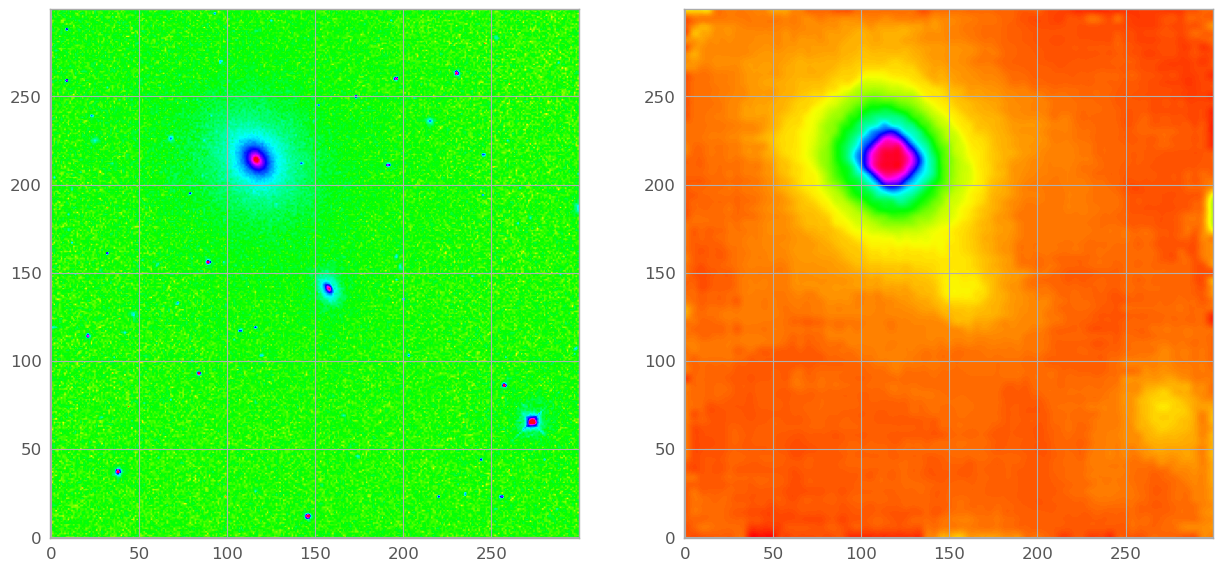

In [21]:
#code to display orginal image and background_image side by side
fig = plt.figure(figsize = (15, 20))
ax = fig.subplots(1, 2)

ax[0].imshow(
    data,
    origin = 'lower',
    cmap = 'hsv',
    norm = norm
)
ax[1].imshow(
    background,
    origin = 'lower',
    cmap = 'hsv'
)

## **Subtraction**

This part is fairly straightfoward. For obtaining background subtracted image you simply have to subtract the estimated image from the source image

In [23]:
residual_iamge = np.subtract(data, background)

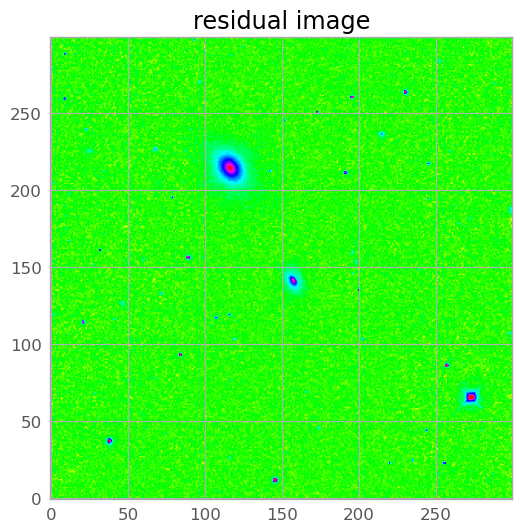

In [25]:
# Display the residual image with  origin = 'lower', cmap = 'hsv', norm = norm
plt.title("residual image")
plt.imshow(
    residual_iamge,
    origin = 'lower',
    cmap = 'hsv',
    norm = norm
)